# Aaronson & Arkhipov response

In [6]:
using BosonSampling
import StatsBase: Weights, sample
using Plots

┌ Info: Precompiling BosonSampling [ede64b7e-1611-462e-b6a2-e80f9d77add9]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Warning: Error requiring IJulia from Plots:
│ MethodError: no method matching joinpath(::Nothing)
│ Closest candidates are:
│   joinpath(!Matched::AbstractString) at path.jl:244
│   joinpath(!Matched::AbstractString, !Matched::AbstractString...) at path.jl:289
│ Stacktrace:
│  [1] _init_ijulia_plotting() at /home/david/.julia/packages/Plots/jIs2V/src/ijulia.jl:7
│  [2] top-level scope at /home/david/.julia/packages/Plots/jIs2V/src/init.jl:75
│  [3] eval at ./boot.jl:331 [inlined]
│  [4] eval at /home/david/.julia/packages/Plots/jIs2V/src/Plots.jl:1 [inlined]
│  [5] (::Plots.var"#277#310")() at /home/david/.julia/packages/Requires/vyVBT/src/require.jl:97
│  [6] err(::Any, ::Module, ::String) at /home/david/.julia/packages/Requires/vyVBT/src/require.jl:42
│  [7] (::Plots.var"#276#309")() at /home/da

In [7]:
function bosonsampling_distribution(mat)
    _, n::Int64 = size(mat)
    @assert n == 9
    lista::Array{Array{Int,1},1} = Array{Int,1}[]
    proba::Array{Float64,1} = Float64[]
    for i in 1:9, j in 1:9, k in 1:9
        pp = abs( per( mat[[i,j,k], 1:3] ) )^2
        push!(proba, pp/(*(factorial.([i,j,k])...)))
        push!(lista, [i,j,k])
    end
    lista, proba
end

bosonsampling_distribution (generic function with 1 method)

In [8]:
function classicalmocking_distribution(m)
    _, n::Int64 = size(m)
    mat = zeros(Float64, n,n)
    mat .= abs2.(m)
    @assert n == 9
    lista::Array{Array{Int,1},1} = Array{Int,1}[]
    proba::Array{Float64,1} = Float64[]
    for i in 1:9, j in 1:9, k in 1:9
        pp = abs( per( mat[[i,j,k], 1:3] ) )^2
        push!(proba, pp/(*(factorial.([i,j,k])...)))
        push!(lista, [i,j,k])
    end
    lista, proba
end

classicalmocking_distribution (generic function with 1 method)

In [9]:
function pestimator(mat, n, filas)
    #tmp = mat[1:n, filas]
    tmp = mat[filas, 1:n]
    total::Float64 = 0.0
    prod::Float64 = 1.0
    for i in 1:n
        total = 0.0
        for j in 1:n
            total += abs(tmp[i,j])^2
        end
        prod *= total
    end
    prod    
end

pestimator (generic function with 1 method)

Generates the probability distribution for BosonSampling and the so-called classical mocking distribution.

In [10]:
mat = rand(Haar(2), 9);
output, proba = bosonsampling_distribution(mat);
output2, proba2 = classicalmocking_distribution(mat);

In [11]:
bosonsampling = Int64[0]
for i in 1:10^3
    tmp = pestimator(mat,3,sample(output, Weights(proba)))
    if tmp > (3/9)^3
        #bosonsampling += 1
        push!(bosonsampling, bosonsampling[end] + 1)
    else
        #bosonsampling -= 1
        push!(bosonsampling, bosonsampling[end] - 1)
    end
end

In [12]:
mockclass = Int64[0]
for i in 1:10^3
    tmp = pestimator(mat,3,sample(output2, Weights(proba2)))
    if tmp > (3/9)^3
        #mockclass += 1
        push!(mockclass, mockclass[end] + 1)
    else
        #mockclass -= 1
        push!(mockclass, mockclass[end] - 1)
    end
end

In [13]:
uniformsampling = Int64[0]
for i in 1:10^3
    tmp = pestimator(mat,3,output[rand(1:729)])
    if tmp > (3/9)^3
        #uniformsampling += 1
        push!(uniformsampling, uniformsampling[end] + 1)
    else
        #uniformsampling -= 1
        push!(uniformsampling, uniformsampling[end] - 1)
    end
end

Here we can see the plots corresponding to uniform and boson sampling.

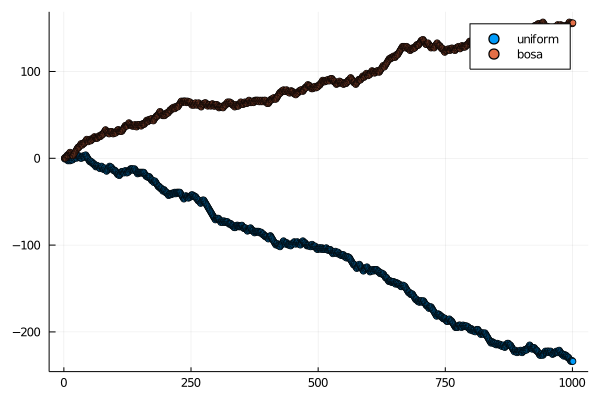

In [14]:
scatter([uniformsampling bosonsampling], label = ["uniform" "bosa"])

Now, we compare the bosonsampling distribution against a distribution proposed by A&A.This new distribution can be efficiently sample but the test is not able to distinguish one from the other.

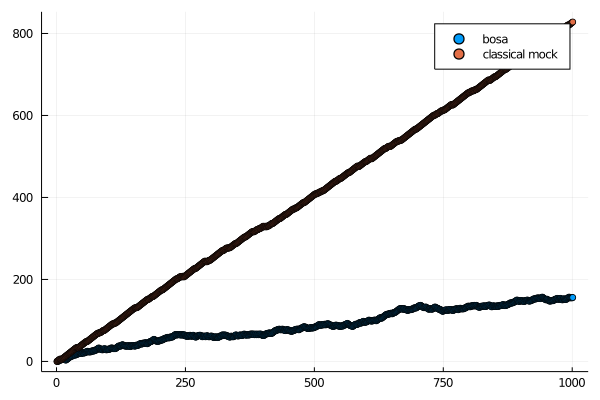

In [15]:
scatter([bosonsampling mockclass], label = ["bosa" "classical mock"])